In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def likelihood(x, y, sigma, modelo, parametro):
    return (-1/2)*np.sum(((y-modelo(x, parametro))**2)/sigma**2)

In [0]:
def montecarlo_chain(x, y, sigma, modelo, p_i, n):

    L_v = likelihood(x, y, sigma, modelo, p_i)
    markov_chain = []
    markov_chain.append([p_i, L_v])
    
    s = [0.1, 0.1]
    
    for i in range(n):
        p_n = []
        p_n = [np.random.normal(p_i[0], s[0]), np.random.normal(p_i[1], s[1])]
        
        L_n = likelihood(x, y, sigma, modelo, p_n)
        
        if (L_n>L_v):
            markov_chain.append([p_n, L_n])
            p_i = p_n 
            L_v = L_n
            continue
        elif  ((np.exp(L_n)/np.exp(L_v)) > np.random.randn()):
            markov_chain.append([p_n, L_n])
        
    else:     
        return markov_chain
        
    return markov_chain

In [0]:
def modelo(x, params):
    return x*params[0]+params[1]

x = np.linspace(0,10,1000)
p_reales = [4, 9]

des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p_reales[0] + p_reales[1]

In [0]:
p_i = [2,2]

In [6]:
a = montecarlo_chain(x,y,des,modelo, p_i, 1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


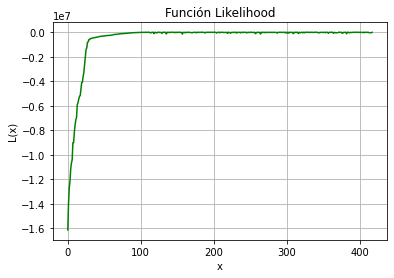

In [7]:
puntos = [x for x,y in a]
lik = [y for x, y in a]

x_fin = [x for x, y in puntos]
y_fin = [y for x, y in puntos]
    
plt.plot(lik, color='g')
plt.title('Función Likelihood')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.grid()

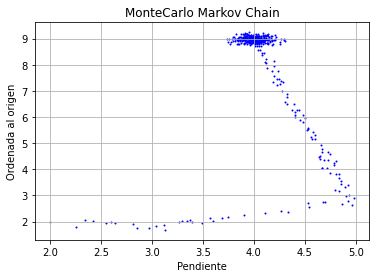

In [9]:
plt.scatter(x_fin, y_fin, color='blue',s=1)
plt.title('MonteCarlo Markov Chain')
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.grid()

In [0]:
################ MULTIPLE MARKOV CHAINS ###################

In [0]:
def lnlikelihood(x, y, sigma, modelo, parametro):
    return (-1/2)*np.sum(((y-modelo(x, parametro))**2)/sigma**2)

In [0]:
def prior(param, a, b):
    if param > a and param < b:
        param = 1/(b-a)
    else:
        param = np.inf
    return param

In [0]:
def montecarlo_chain(x, y, sigma, modelo, p_i, n, nc):

    markov_matrix = []
    acept = np.zeros(nc)
    
    for ic in range(nc):
    
        P_v = lnlikelihood(x, y, sigma, modelo, p_i[ic])*prior(np.random.normal(0,1),-1,1)
        markov_chain = []
        markov_chain.append([p_i[ic], P_v])

        s = [0.1, 0.1]

        for i in range(n):
            p_n = []
            p_n = [np.random.normal(p_i[ic][0], s[0]), np.random.normal(p_i[ic][1], s[1])]

            P_n = lnlikelihood(x, y, sigma, modelo, p_n)*prior(np.random.normal(0,1),-1,1)

            if (P_n>P_v):
                markov_chain.append([p_n, P_n])
                acept[ic] = acept[ic]+1
                p_i[ic] = p_n 
                P_v = P_n
                continue
            elif  ((np.exp(P_n)/np.exp(P_v)) > np.random.randn()):
                markov_chain.append([p_n, P_n])
                acept[ic]= acept[ic]+1
    
        markov_matrix.append(markov_chain)
        
    return [markov_matrix, acept]

In [0]:
def modelo(x, parametro):
    return x*parametro[0]+parametro[1]

x = np.linspace(0,10,1000)
p_reales = [4, 9]

des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p_reales[0] + p_reales[1]

In [0]:
p_i = [[2,2],[10,17],[9,1],[7,10], [-1,8]]
nc = 5
n = 1000

In [16]:
a = montecarlo_chain(x,y,des,modelo, p_i, n, nc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


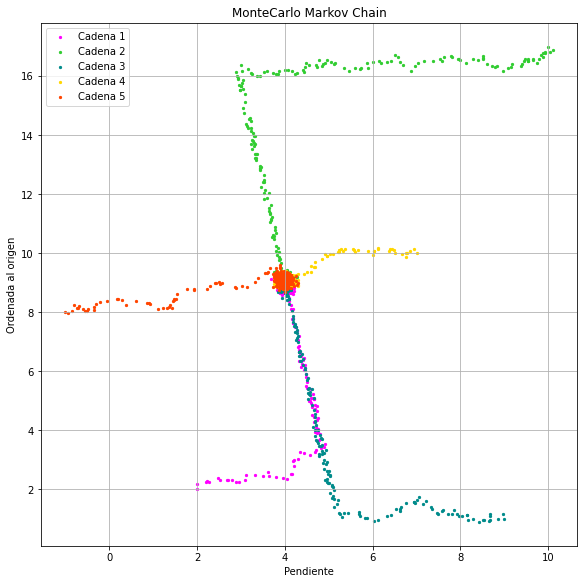

In [17]:
colores = ["#32CD32", "#008B8B", "#FFD700", "#FF4500", "#FF00FF"]
lik = []
fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)
for i in range(nc):
    puntos = [x for x,y in a[0][i]]
    lik.append([y for x, y in a[0][i]])

    x_fin = [x for x, y in puntos]
    y_fin = [y for x, y in puntos]
    
    plt.scatter(x_fin, y_fin, color=colores[i-1],s=5, label='Cadena '+str(i+1))

plt.title('MonteCarlo Markov Chain')
plt.xlabel('Pendiente')
plt.ylabel('Ordenada al origen')
plt.legend()
plt.grid()